# Prepare Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
#from tqdm import tqdm
np.random.seed(0)
random.seed(0)

In [2]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [3]:
data = data.drop('Unnamed: 0', axis=1)
data = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z', 'price']]
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,330
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,327
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,328
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,337
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,338


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
categorical_features = ['cut', 'color', 'clarity']
#numerical_withtarget = data.drop(categorical_features, axis=1) # remove the categorical feature

# Question 1

In [6]:
from sklearn.preprocessing import StandardScaler

#numerize all categorical data
data_copy = data.copy()
for i in categorical_features:
    cat_arr = list(data_copy[i].unique())
    len_ = len(data_copy[i].value_counts())
    data_copy[i].replace(cat_arr,[n for n in range(1, len_+1)], inplace=True)

scaler = StandardScaler()
diamond_X = data_copy.drop('price', axis=1) # remove the target
diamond_X_std = scaler.fit_transform(diamond_X)
diamond_std = scaler.fit_transform(data_copy)
diamond_y_std = diamond_std[:, -1]

# Question 2

In [7]:
from pandas.plotting import scatter_matrix

corr_matrix = data_copy.corr()
corr_matrix

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.114426,-0.065386,-0.281218,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
cut,0.114426,1.000000,-0.029128,-0.118670,0.169916,0.381988,0.105361,0.105319,0.126726,0.049423
color,-0.065386,-0.029128,1.000000,0.032589,-0.001665,-0.033998,-0.055268,-0.054762,-0.055684,-0.016562
clarity,-0.281218,-0.118670,0.032589,1.000000,-0.025877,-0.133692,-0.305918,-0.297037,-0.299969,-0.140271
depth,0.028224,0.169916,-0.001665,-0.025877,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010648
table,0.181618,0.381988,-0.033998,-0.133692,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,0.105361,-0.055268,-0.305918,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884436
y,0.951722,0.105319,-0.054762,-0.297037,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865422
z,0.953387,0.126726,-0.055684,-0.299969,0.094924,0.150929,0.970772,0.952006,1.000000,0.861250
price,0.921591,0.049423,-0.016562,-0.140271,-0.010648,0.127134,0.884436,0.865422,0.861250,1.000000


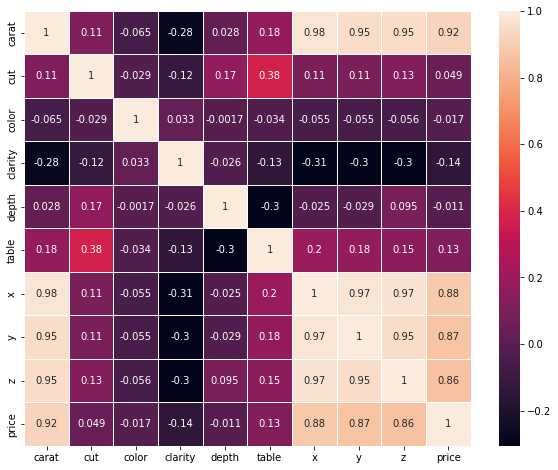

In [8]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, linewidth=0.5)

# Question 3

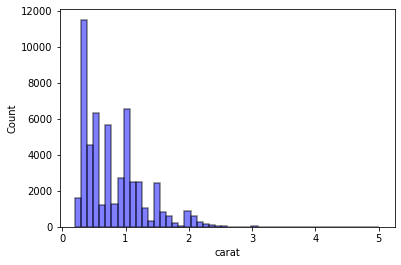

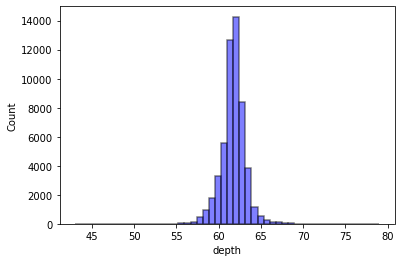

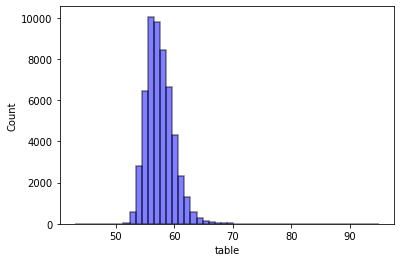

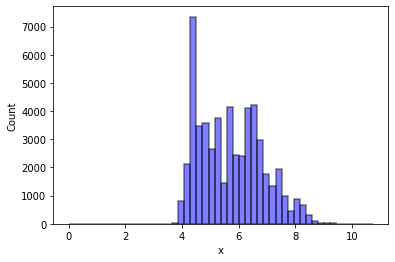

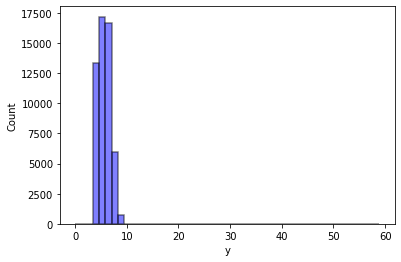

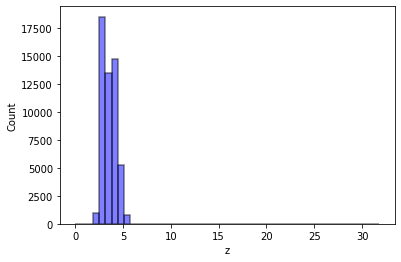

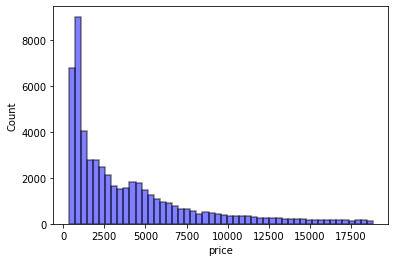

In [9]:
numerical = data.drop(categorical_features, axis=1)

for i in range(numerical.shape[1]):
    plt.figure()
    plt.hist(numerical.iloc[:,i], bins=50, edgecolor='k', facecolor='b', linewidth=1.5, alpha=0.5)
    plt.xlabel(numerical.columns[i])
    plt.ylabel('Count')
    plt.show()

# Question 4

In [10]:
categorical = data[categorical_features]
categorical.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


C:\Users\ericz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


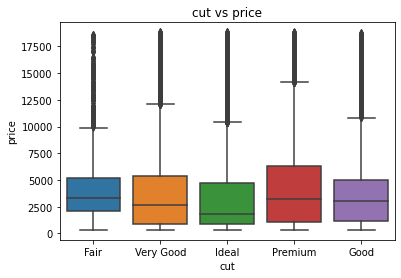

C:\Users\ericz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


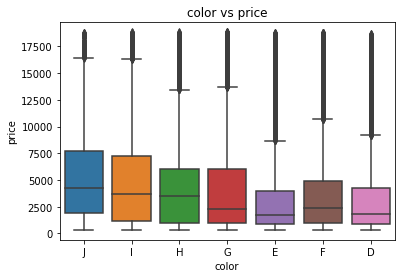

C:\Users\ericz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


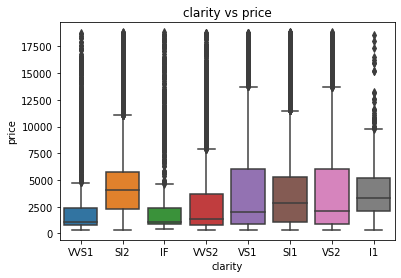

In [11]:
diamond_y = data_copy['price'] # extract the target
for i in categorical_features:
    sns.boxplot(categorical[i], diamond_y, order=list(set(categorical[i])))
    plt.title(i +' vs '+ 'price')
    plt.show()

# Question 5

In [12]:
# dfn = pd.melt(categorical.reset_index(), id_vars=['index'], var_name='cat', value_name='number')
# ax = sns.barplot(x="cat", y="number", hue="index", data=dfn)

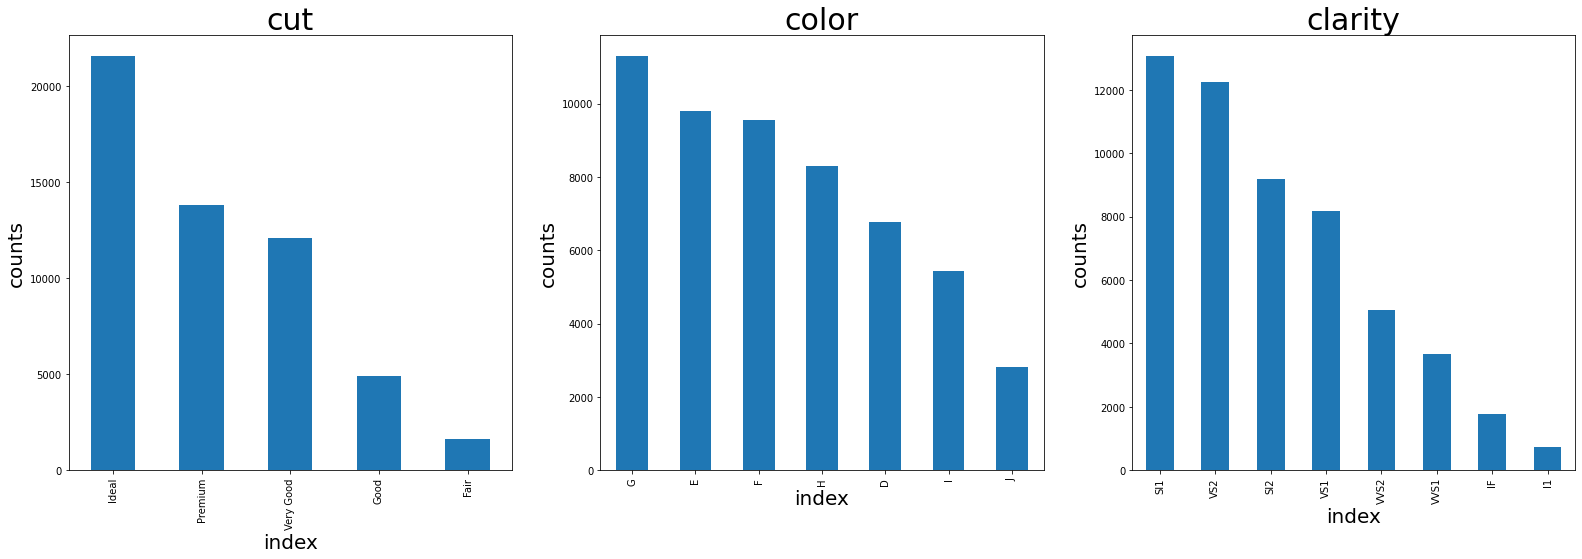

In [13]:
plt.figure(figsize=(27, 8))
for i in range(len(categorical_features)):
    axes = plt.subplot(1, 3, i+1)
    categorical[categorical_features[i]].value_counts().plot(kind='bar')
    axes.set_xlabel('index', fontsize=20)
    axes.set_ylabel('counts', fontsize=20)
    plt.title(categorical_features[i], fontsize=30)


# Question 7

In [14]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

MutualInfo_std = mutual_info_regression(diamond_X_std, diamond_y_std)
Fscore_std = f_regression(diamond_X_std, diamond_y_std)

In [15]:
diamond_X_nostd = diamond_X.to_numpy()
MutualInfo_nostd = mutual_info_regression(diamond_X_nostd, diamond_y)
Fscore_nostd = f_regression(diamond_X_nostd, diamond_y)

In [16]:
top6_MI_std = np.argsort(MutualInfo_std)[::-1][:6]
top6_FS_std = np.argsort(Fscore_std[0])[::-1][:6]
diamond_X_std_top6_MI = diamond_X.iloc[:, top6_MI_std]
diamond_X_std_top6_FS = diamond_X.iloc[:, top6_FS_std]

top6_MI_nostd = np.argsort(MutualInfo_nostd)[::-1][:6]
top6_FS_nostd = np.argsort(Fscore_nostd[0])[::-1][:6]
diamond_X_nostd_top6_MI = diamond_X.iloc[:, top6_MI_nostd]
diamond_X_nostd_top6_FS = diamond_X.iloc[:, top6_FS_nostd]

In [17]:
diamond_X.columns[top6_MI_std]

Index(['carat', 'y', 'x', 'z', 'clarity', 'color'], dtype='object')

In [18]:
diamond_X.columns[top6_FS_std]

Index(['carat', 'x', 'y', 'z', 'clarity', 'table'], dtype='object')

In [19]:
diamond_X.columns[top6_MI_nostd]

Index(['carat', 'y', 'x', 'z', 'clarity', 'color'], dtype='object')

In [20]:
diamond_X.columns[top6_FS_nostd]

Index(['carat', 'x', 'y', 'z', 'clarity', 'table'], dtype='object')

# Question 8-10

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

linear = LinearRegression()

lr_train_score = []
lr_test_score = []
diamond_important_X = [diamond_X_nostd_top6_MI, diamond_X_std_top6_MI, diamond_X_nostd_top6_FS, diamond_X_std_top6_FS]
#print(diamond_important_X)

for X in diamond_important_X:
    cv_results = cross_validate(linear, X, diamond_y_std, scoring='neg_root_mean_squared_error', return_train_score=True, cv=10)
    lr_train_score.append(np.mean(cv_results['train_score']))
    lr_test_score.append(np.mean(cv_results['test_score']))


In [22]:
lr_results = pd.DataFrame(data={'mean_test_score': lr_test_score, 'mean_train_score': lr_train_score,
                                'param_model': 'LinearRegression()', 'param_model__alpha': 'N/A', 
                                'Standardize': [False, True, False, True], 
                                'Feature Selection': ['Mutual Information', 'Mutual Information', 'F Scores', 'F Scores']})

lr_results 

,mean_test_score,mean_train_score,param_model,param_model__alpha,Standardize,Feature Selection
0,-0.344874,-0.358772,LinearRegression(),N/A,False,Mutual Information
1,-0.344874,-0.358772,LinearRegression(),N/A,True,Mutual Information
2,-0.346096,-0.360126,LinearRegression(),N/A,False,F Scores
3,-0.346096,-0.360126,LinearRegression(),N/A,True,F Scores


In [23]:
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
import time

time_start =time.time()

cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=False)

ridge = Ridge(random_state=0, max_iter=1000)
lasso = Lasso(random_state=0, max_iter=1000)

pipe = Pipeline([('model', linear)],memory=memory)

param_grid = {
    'model': [ridge, lasso],
    'model__alpha': [10.0**x for x in range(-3,3)]
}

grid1 = GridSearchCV(pipe,cv=10,param_grid=param_grid,scoring='neg_root_mean_squared_error',return_train_score=True)
grid1.fit(diamond_X_nostd_top6_MI, diamond_y)

grid2 = GridSearchCV(pipe,cv=10,param_grid=param_grid,scoring='neg_root_mean_squared_error',return_train_score=True)
grid2.fit(diamond_X_std_top6_MI, diamond_y_std)

grid3 = GridSearchCV(pipe,cv=10,param_grid=param_grid,scoring='neg_root_mean_squared_error',return_train_score=True)
grid3.fit(diamond_X_nostd_top6_FS, diamond_y)

grid4 = GridSearchCV(pipe,cv=10,param_grid=param_grid,scoring='neg_root_mean_squared_error',return_train_score=True)
grid4.fit(diamond_X_std_top6_FS, diamond_y_std)

rmtree(cachedir)
print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 42.464072704315186


In [24]:
lr_reg_result1 = pd.DataFrame(grid1.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model', 'param_model__alpha']]
lr_reg_result1['Standardize'] = False
lr_reg_result1['Feature Selection'] = 'Mutual Information'

lr_reg_result2 = pd.DataFrame(grid2.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model', 'param_model__alpha']]
lr_reg_result2['Standardize'] = True
lr_reg_result2['Feature Selection'] = 'Mutual Information'

lr_reg_result3 = pd.DataFrame(grid3.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model', 'param_model__alpha']]
lr_reg_result3['Standardize'] = False
lr_reg_result3['Feature Selection'] = 'F Scores'

lr_reg_result4 = pd.DataFrame(grid4.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model', 'param_model__alpha']]
lr_reg_result4['Standardize'] = True
lr_reg_result4['Feature Selection'] = 'F Scores'

results = pd.concat([lr_results, lr_reg_result1, lr_reg_result2, lr_reg_result3, lr_reg_result4])
results = results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
results.head(20)

,mean_test_score,mean_train_score,param_model,param_model__alpha,Standardize,Feature Selection
0,-0.344874,-0.358772,LinearRegression(),N/A,False,Mutual Information
1,-0.344874,-0.358772,LinearRegression(),N/A,True,Mutual Information
2,-0.344874,-0.358772,"Ridge(alpha=0.001, max_iter=1000, random_state=0)",0.001,True,Mutual Information
3,-0.344875,-0.358772,"Ridge(alpha=0.001, max_iter=1000, random_state=0)",0.01,True,Mutual Information
4,-0.344883,-0.358772,"Ridge(alpha=0.001, max_iter=1000, random_state=0)",0.1,True,Mutual Information
5,-0.344960,-0.358772,"Ridge(alpha=0.001, max_iter=1000, random_state=0)",1.0,True,Mutual Information
6,-0.345750,-0.358808,"Ridge(alpha=0.001, max_iter=1000, random_state=0)",10.0,True,Mutual Information
7,-0.346096,-0.360126,LinearRegression(),N/A,False,F Scores
8,-0.346096,-0.360126,LinearRegression(),N/A,True,F Scores
9,-0.346096,-0.360126,"Ridge(alpha=0.001, max_iter=1000, random_state=0)",0.001,True,F Scores


# Question 11

In [25]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [26]:
import statsmodels.api as sm

lm_fit = sm.OLS(diamond_y, sm.add_constant(diamond_X)).fit()
lm_fit.pvalues.sort_values(ascending=True)

C:\Users\ericz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


carat       0.000000e+00
clarity     0.000000e+00
const      3.457529e-178
depth      1.359861e-177
color      1.631536e-173
x          6.459579e-154
table       4.256991e-70
cut         4.830197e-52
y           5.081300e-04
z           1.530477e-01
dtype: float64

# Question 12-14

In [27]:
import time
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

time_start =time.time()

cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=False)

pipe_poly = Pipeline([
    ('poly_transform', PolynomialFeatures()),
    ('model', Ridge(alpha=0.001, random_state=0, max_iter=3000))
])

param_grid = {
    'poly_transform__degree': np.arange(1,8,1)
}

grid_Q12 = GridSearchCV(pipe_poly, param_grid=param_grid, cv=7, n_jobs=-1, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_Q12.fit(diamond_X_std_top6_FS, diamond_y_std)

rmtree(cachedir)
print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 310.0897648334503


In [28]:
poly_result = pd.DataFrame(grid_Q12.cv_results_)[['mean_test_score', 'mean_train_score', 'param_poly_transform__degree']]
poly_result

,mean_test_score,mean_train_score,param_poly_transform__degree
0,-3.699778e-01,-0.355717,1
1,-5.556096e-01,-0.309752,2
2,-3.096153e+00,-0.285952,3
3,-6.065574e+02,-0.274375,4
4,-5.357387e+04,-0.262942,5
5,-5.730594e+06,-0.241677,6
6,-6.044928e+08,-0.230431,7


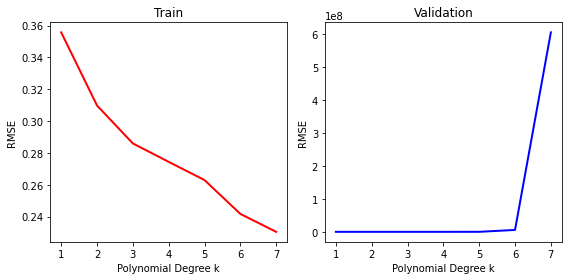

In [29]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(poly_result['param_poly_transform__degree'], -poly_result['mean_train_score'], linewidth=2, color='r')
plt.xticks(np.arange(1,8))
plt.xlabel('Polynomial Degree k')
plt.ylabel('RMSE')
plt.title('Train')

plt.subplot(1,2,2)
plt.plot(poly_result['param_poly_transform__degree'], -poly_result['mean_test_score'], linewidth=2, color='b')
plt.title('Validation')
plt.xticks(np.arange(1,8))
plt.xlabel('Polynomial Degree k')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

In [30]:
diamond_X_standard_top6_FS = diamond_X_std[:, top6_FS_std]
diamond_poly_optimal = Ridge(alpha=0.001, random_state=0, max_iter=3000).fit(PolynomialFeatures(3).fit_transform(diamond_X_standard_top6_FS), diamond_y_std)

In [31]:
np.argsort(diamond_poly_optimal.coef_)[::-1]

array([65, 35, 36, 37, 69,  9,  8, 49, 56, 30, 31, 71,  2,  3, 18, 38, 57,
       19, 20, 16,  1, 58, 23, 60, 34, 66, 28, 72,  5, 43, 12, 39, 33, 78,
       32, 24, 75, 67, 63, 73, 80, 47, 83, 74,  0, 81, 79, 82, 44, 76, 27,
       22, 26, 48,  6, 77, 15, 45, 17, 25, 21,  4, 62, 70, 46, 64, 68, 13,
       10, 42, 61, 53, 55, 52, 51,  7, 11, 54, 14, 59, 50, 41, 29, 40],
      dtype=int64)

In [32]:
diamond_X_cross_feature = np.prod(diamond_X[['x','y', 'z']], axis=1)
diamond_X_cross_feature = preprocessing.scale(diamond_X_cross_feature)
diamond_X_cross_concat = np.concatenate((diamond_X_standard_top6_FS, diamond_X_cross_feature.reshape(-1,1)), axis=1)
lm_cross_concat = cross_validate(Ridge(alpha=0.001, random_state=0, max_iter=3000), 
                                   diamond_X_cross_concat, diamond_y_std, scoring='neg_root_mean_squared_error', cv=10)
rmse_cross_concat = np.mean(-lm_cross_concat['test_score'])
rmse_cross_concat


0.35118885602956174

# Question 15-18

In [33]:
from sklearn.neural_network import MLPRegressor

time_start =time.time()

pipe_NN1 = Pipeline([
    ('model', MLPRegressor(random_state=0, max_iter=3000))
])

param_grid = {
    'model__hidden_layer_sizes': [(x,) for x in np.arange(1, 31)]
}

grid_Q16 = GridSearchCV(pipe_NN1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=False, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True)

grid_Q16.fit(diamond_X_std, diamond_y_std)
print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 479.2834165096283


In [34]:
nn1_results = pd.DataFrame(grid_Q16.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__hidden_layer_sizes']]
nn1_results = nn1_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
nn1_results.head(10)

,mean_test_score,mean_train_score,param_model__hidden_layer_sizes
0,-0.326658,-0.206251,"(29,)"
1,-0.331476,-0.198489,"(24,)"
2,-0.332862,-0.203134,"(21,)"
3,-0.333010,-0.204021,"(28,)"
4,-0.334200,-0.198363,"(22,)"
5,-0.334625,-0.219228,"(16,)"
6,-0.338001,-0.208275,"(12,)"
7,-0.338258,-0.191707,"(20,)"
8,-0.338844,-0.188237,"(27,)"
9,-0.341802,-0.202986,"(18,)"


In [35]:
time_start =time.time()

pipe_NN2 = Pipeline([
    ('model', MLPRegressor(random_state=0,max_iter=50))
])
                         
param_grid = {
    'model__hidden_layer_sizes': [(x,) for x in np.arange(1, 31)],
    'model__alpha': [10.0**x for x in np.arange(-3,3)],
    'model__activation': ['logistic', 'tanh', 'relu']   
}

grid_Q17 = GridSearchCV(pipe_NN2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=False, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True)

grid_Q17.fit(diamond_X_std, diamond_y_std)
print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 4512.831115484238


C:\Users\ericz\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
nn2_results = pd.DataFrame(grid_Q17.cv_results_)[['mean_test_score','mean_train_score','param_model__hidden_layer_sizes', 'param_model__alpha','param_model__activation']]
nn2_results = nn2_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
nn2_results.head(10)

,mean_test_score,mean_train_score,param_model__hidden_layer_sizes,param_model__alpha,param_model__activation
0,-0.317892,-0.214216,"(28,)",0.001,tanh
1,-0.318212,-0.214664,"(28,)",0.01,tanh
2,-0.319766,-0.212636,"(30,)",0.01,tanh
3,-0.319882,-0.212187,"(30,)",0.001,tanh
4,-0.322797,-0.218046,"(20,)",0.01,tanh
5,-0.323735,-0.212131,"(24,)",0.001,tanh
6,-0.324001,-0.214926,"(26,)",0.001,tanh
7,-0.324147,-0.213496,"(24,)",0.01,tanh
8,-0.324280,-0.215375,"(26,)",0.01,tanh
9,-0.326507,-0.215265,"(29,)",0.1,relu


# Question 19-21

In [37]:
from sklearn.ensemble import RandomForestRegressor

time_start =time.time()

pipe_RF_feature = Pipeline([
    ('model', RandomForestRegressor(random_state=0))
])

param_grid = {
    'model__max_features': np.arange(0.1,1.1,0.1)
}

grid_RF_feature = GridSearchCV(pipe_RF_feature, param_grid=param_grid, cv=5, n_jobs=-1,verbose=False,
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True)

grid_RF_feature.fit(diamond_X_std, diamond_y_std)

print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 339.2612545490265


In [38]:
rf_feature_results = pd.DataFrame(grid_RF_feature.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__max_features']]
rf_feature_results = rf_feature_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
rf_feature_results.head(10)

,mean_test_score,mean_train_score,param_model__max_features
0,-0.357846,-0.050376,0.7
1,-0.357947,-0.051049,0.6
2,-0.359212,-0.050136,0.8
3,-0.359494,-0.052025,0.5
4,-0.359870,-0.050285,0.9
5,-0.360650,-0.054268,0.4
6,-0.366019,-0.050335,1.0
7,-0.368745,-0.059316,0.3
8,-0.386353,-0.068822,0.1
9,-0.386353,-0.068822,0.2


In [39]:
time_start =time.time()

pipe_RF_tree = Pipeline([
    ('model', RandomForestRegressor(max_features=0.6, random_state=0))
])

param_grid = {
    'model__n_estimators': np.arange(40, 300, 20)
}

grid_RF_tree = GridSearchCV(pipe_RF_tree, param_grid=param_grid, cv=5, n_jobs=-1,verbose=False,
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True)

grid_RF_tree.fit(diamond_X_std, diamond_y_std)

print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 709.5675141811371


In [40]:
rf_tree_results = pd.DataFrame(grid_RF_tree.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__n_estimators']]
rf_tree_results = rf_tree_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
rf_tree_results.head(10)

,mean_test_score,mean_train_score,param_model__n_estimators
0,-0.356693,-0.050183,200
1,-0.356869,-0.050109,220
2,-0.356984,-0.049992,260
3,-0.357002,-0.050049,240
4,-0.357014,-0.050324,160
5,-0.357122,-0.050251,180
6,-0.357128,-0.049965,280
7,-0.357266,-0.050473,140
8,-0.357490,-0.050708,120
9,-0.357947,-0.051049,100


In [41]:
time_start =time.time()

pipe_RF_depth = Pipeline([
    ('model', RandomForestRegressor(n_estimators=80, max_features=0.6, random_state=0))
])

param_grid = {
    'model__max_depth': np.arange(1, 31, 1)
}

grid_RF_depth = GridSearchCV(pipe_RF_depth, param_grid=param_grid, cv=5, n_jobs=-1,verbose=False,
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True)

grid_RF_depth.fit(diamond_X_std, diamond_y_std)

print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 464.315895318985


In [42]:
rf_depth_results = pd.DataFrame(grid_RF_depth.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__max_depth']]
rf_depth_results = rf_depth_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
rf_depth_results.head(10)

,mean_test_score,mean_train_score,param_model__max_depth
0,-0.356786,-0.051660,24
1,-0.356901,-0.051103,27
2,-0.356967,-0.051221,29
3,-0.357054,-0.051243,28
4,-0.357468,-0.051254,26
5,-0.357636,-0.052410,22
6,-0.357821,-0.051786,23
7,-0.358068,-0.054754,20
8,-0.358144,-0.051451,25
9,-0.358188,-0.060789,18


In [43]:
rf_vis = RandomForestRegressor(n_estimators=80, max_features=0.6, max_depth=4, random_state=0, oob_score=True)
rf_vis.fit(diamond_X_std, diamond_y_std)

RandomForestRegressor(max_depth=4, max_features=0.6, n_estimators=80,
                      oob_score=True, random_state=0)

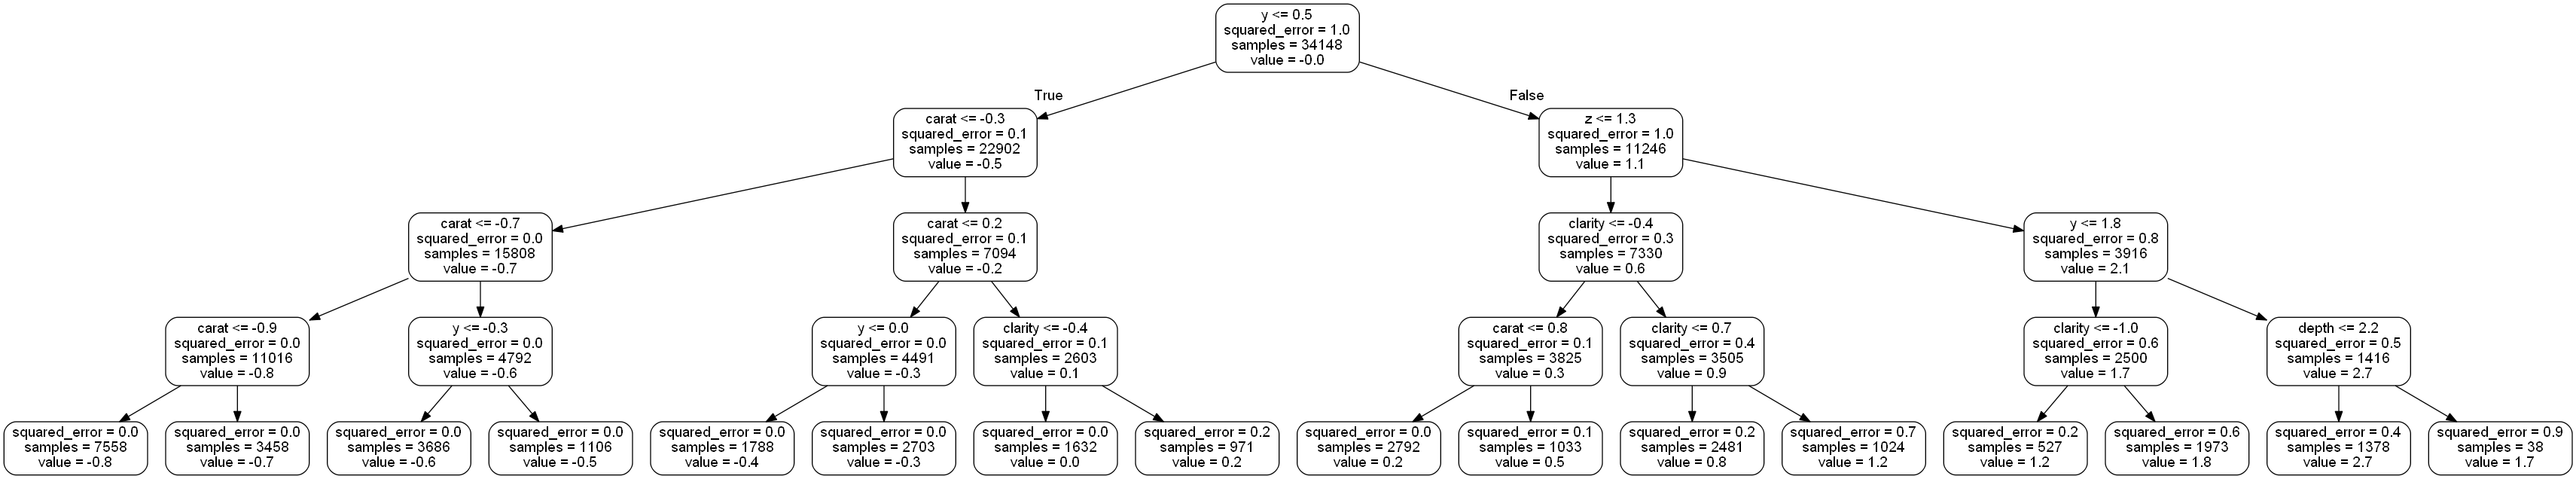

In [44]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

tree = rf_vis.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = diamond_X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# Question 22-24

In [45]:
from skopt import BayesSearchCV
from catboost import CatBoostRegressor
import lightgbm as lgb
import time

In [46]:
#pip install scikit_optimize

In [47]:
time_start =time.time()

opt = BayesSearchCV(
    lgb.LGBMRegressor(random_state=0, n_jobs=-1),
    {
        'boosting_type': ['gbdt', 'dart','rf'],
        'num_leaves': np.arange(10,3000,100),
        'max_depth': [2**i for i in range(5)],
        'n_estimators': np.arange(10,4000,100),
        'reg_alpha': [10.0**x for x in np.arange(-4,2)],
        'reg_lambda': [10.0**x for x in np.arange(-4,2)],
        'subsample': np.arange(0.1,1,0.1),
        'subsample_freq': np.arange(0,20,5),
        'min_split_gain': [10.0**x for x in np.arange(-4,0)]
    },
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=False,
    random_state=0,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

_ = opt.fit(diamond_X_std, diamond_y_std)

print('\nTime to run code: {}'.format(time.time()-time_start))


Time to run code: 2918.6869094371796


In [48]:
print('Best parameters:',opt.best_params_,',Test RMSE:',opt.best_score_)
print('Train RMSE:',min(opt.cv_results_['mean_train_score']))

Best parameters: OrderedDict([('boosting_type', 'gbdt'), ('max_depth', 4), ('min_split_gain', 0.001), ('n_estimators', 3110), ('num_leaves', 210), ('reg_alpha', 1.0), ('reg_lambda', 1.0), ('subsample', 0.5), ('subsample_freq', 10)]) ,Test RMSE: -0.2758162942730318
Train RMSE: -0.24690464927487055


In [49]:
opt_results = pd.DataFrame(opt.cv_results_)[['mean_test_score', 'mean_train_score', 'param_boosting_type', 'param_num_leaves', 'param_max_depth', 'param_n_estimators','param_reg_alpha', 'param_reg_lambda','param_subsample', 'param_subsample_freq','param_min_split_gain']]
opt_results = opt_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
opt_results.head(10)

,mean_test_score,mean_train_score,param_boosting_type,param_num_leaves,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,param_subsample_freq,param_min_split_gain
0,-0.275816,-0.101435,gbdt,210,4,3110,1.0,1.0,0.5,10,0.001
1,-0.288591,-0.092936,dart,2410,8,1810,0.1,1.0,0.4,5,0.001
2,-0.290269,-0.115269,dart,1310,16,3610,0.1,0.01,0.1,5,0.01
3,-0.328401,-0.150652,gbdt,210,4,110,0.001,0.001,0.3,5,0.01
4,-0.333888,-0.108777,gbdt,810,16,2310,0.001,1.0,0.6,0,0.1
5,-0.342693,-0.189913,dart,510,2,1110,0.001,0.0001,0.1,0,0.01
6,-0.361240,-0.171567,gbdt,2510,8,2510,10.0,0.001,0.1,10,0.01
7,-0.416695,-0.172692,rf,1010,16,1910,0.001,1.0,0.7,5,0.01
8,-0.419286,-0.246905,gbdt,710,1,710,0.01,0.1,0.4,10,0.001
9,-0.428706,-0.186893,rf,710,8,710,1.0,0.01,0.7,10,0.001


In [50]:
time_start =time.time()

optcatLG = BayesSearchCV(
    CatBoostRegressor(random_state=0,verbose=1,thread_count=-1,bootstrap_type='Bayesian'), 
    {
        'colsample_bylevel': np.arange(0.1,1,0.1),
        'num_trees': np.arange(10,1000,100),
        'l2_leaf_reg': [10.0**x for x in np.arange(-4,5)],
        'num_leaves': np.arange(10,3000,100),
        'max_depth': [2**i for i in range(5)],
        'bagging_temperature': np.arange(0.1,10,1),
        'grow_policy': ['Lossguide'],
        
    },
    n_iter=10,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=0,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

_ = optcatLG.fit(diamond_X_std, diamond_y_std)

print('\nTime to run code: {}'.format(time.time()-time_start))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.9728692	total: 233ms	remaining: 3m 8s
1:	learn: 0.9461110	total: 315ms	remaining: 2m 7s
2:	learn: 0.9205536	total: 387ms	remaining: 1m 44s
3:	learn: 0.8958702	total: 461ms	remaining: 1m 32s
4:	learn: 0.8716883	total: 531ms	remaining: 1m 25s
5:	learn: 0.8482537	total: 607ms	remaining: 1m 21s
6:	learn: 0.8257839	total: 697ms	remaining: 1m 19s
7:	learn: 0.8037720	total: 777ms	remaining: 1m 17s
8:	l

154:	learn: 0.1353476	total: 13.2s	remaining: 55.7s
155:	learn: 0.1350385	total: 13.3s	remaining: 55.6s
156:	learn: 0.1347153	total: 13.4s	remaining: 55.6s
157:	learn: 0.1344184	total: 13.4s	remaining: 55.5s
158:	learn: 0.1342468	total: 13.5s	remaining: 55.3s
159:	learn: 0.1339839	total: 13.6s	remaining: 55.2s
160:	learn: 0.1338186	total: 13.7s	remaining: 55.1s
161:	learn: 0.1334995	total: 13.8s	remaining: 55.1s
162:	learn: 0.1332956	total: 13.9s	remaining: 55s
163:	learn: 0.1330796	total: 13.9s	remaining: 54.9s
164:	learn: 0.1328464	total: 14s	remaining: 54.9s
165:	learn: 0.1326173	total: 14.2s	remaining: 54.9s
166:	learn: 0.1324126	total: 14.3s	remaining: 54.9s
167:	learn: 0.1322270	total: 14.3s	remaining: 54.8s
168:	learn: 0.1320373	total: 14.4s	remaining: 54.8s
169:	learn: 0.1318666	total: 14.5s	remaining: 54.7s
170:	learn: 0.1317017	total: 14.6s	remaining: 54.6s
171:	learn: 0.1314710	total: 14.7s	remaining: 54.5s
172:	learn: 0.1312864	total: 14.8s	remaining: 54.4s
173:	learn: 0.13

313:	learn: 0.1162712	total: 26.4s	remaining: 41.7s
314:	learn: 0.1162002	total: 26.5s	remaining: 41.6s
315:	learn: 0.1161421	total: 26.5s	remaining: 41.5s
316:	learn: 0.1160678	total: 26.6s	remaining: 41.4s
317:	learn: 0.1160182	total: 26.7s	remaining: 41.3s
318:	learn: 0.1159418	total: 26.8s	remaining: 41.2s
319:	learn: 0.1158237	total: 26.8s	remaining: 41.1s
320:	learn: 0.1157270	total: 26.9s	remaining: 41s
321:	learn: 0.1156606	total: 27s	remaining: 41s
322:	learn: 0.1156026	total: 27.1s	remaining: 40.9s
323:	learn: 0.1155103	total: 27.2s	remaining: 40.8s
324:	learn: 0.1154446	total: 27.3s	remaining: 40.7s
325:	learn: 0.1153975	total: 27.4s	remaining: 40.6s
326:	learn: 0.1153640	total: 27.4s	remaining: 40.5s
327:	learn: 0.1152801	total: 27.5s	remaining: 40.5s
328:	learn: 0.1151869	total: 27.6s	remaining: 40.4s
329:	learn: 0.1151137	total: 27.7s	remaining: 40.3s
330:	learn: 0.1150207	total: 27.8s	remaining: 40.2s
331:	learn: 0.1149784	total: 27.8s	remaining: 40.1s
332:	learn: 0.1148

474:	learn: 0.1042790	total: 39.4s	remaining: 27.8s
475:	learn: 0.1042136	total: 39.5s	remaining: 27.7s
476:	learn: 0.1041699	total: 39.6s	remaining: 27.6s
477:	learn: 0.1041125	total: 39.6s	remaining: 27.5s
478:	learn: 0.1040348	total: 39.7s	remaining: 27.4s
479:	learn: 0.1039513	total: 39.8s	remaining: 27.4s
480:	learn: 0.1038566	total: 39.9s	remaining: 27.3s
481:	learn: 0.1037850	total: 40s	remaining: 27.2s
482:	learn: 0.1037265	total: 40.1s	remaining: 27.1s
483:	learn: 0.1036476	total: 40.2s	remaining: 27.1s
484:	learn: 0.1035911	total: 40.3s	remaining: 27s
485:	learn: 0.1035075	total: 40.4s	remaining: 26.9s
486:	learn: 0.1034296	total: 40.4s	remaining: 26.8s
487:	learn: 0.1033912	total: 40.5s	remaining: 26.7s
488:	learn: 0.1033146	total: 40.6s	remaining: 26.6s
489:	learn: 0.1032636	total: 40.7s	remaining: 26.6s
490:	learn: 0.1032380	total: 40.7s	remaining: 26.5s
491:	learn: 0.1031710	total: 40.8s	remaining: 26.4s
492:	learn: 0.1031008	total: 40.9s	remaining: 26.3s
493:	learn: 0.10

634:	learn: 0.0946204	total: 53.2s	remaining: 14.7s
635:	learn: 0.0945727	total: 53.2s	remaining: 14.6s
636:	learn: 0.0945233	total: 53.3s	remaining: 14.5s
637:	learn: 0.0944699	total: 53.4s	remaining: 14.4s
638:	learn: 0.0944029	total: 53.5s	remaining: 14.3s
639:	learn: 0.0943510	total: 53.6s	remaining: 14.2s
640:	learn: 0.0942951	total: 53.7s	remaining: 14.2s
641:	learn: 0.0942480	total: 53.8s	remaining: 14.1s
642:	learn: 0.0941971	total: 53.9s	remaining: 14s
643:	learn: 0.0941468	total: 54s	remaining: 13.9s
644:	learn: 0.0940906	total: 54.1s	remaining: 13.8s
645:	learn: 0.0940539	total: 54.2s	remaining: 13.8s
646:	learn: 0.0940132	total: 54.3s	remaining: 13.7s
647:	learn: 0.0939567	total: 54.4s	remaining: 13.6s
648:	learn: 0.0939034	total: 54.6s	remaining: 13.5s
649:	learn: 0.0938455	total: 54.7s	remaining: 13.5s
650:	learn: 0.0937831	total: 54.8s	remaining: 13.4s
651:	learn: 0.0937292	total: 54.9s	remaining: 13.3s
652:	learn: 0.0936866	total: 55.1s	remaining: 13.2s
653:	learn: 0.09

794:	learn: 0.0872174	total: 1m 6s	remaining: 1.25s
795:	learn: 0.0871893	total: 1m 6s	remaining: 1.17s
796:	learn: 0.0871341	total: 1m 6s	remaining: 1.08s
797:	learn: 0.0871063	total: 1m 6s	remaining: 1s
798:	learn: 0.0870559	total: 1m 6s	remaining: 918ms
799:	learn: 0.0870346	total: 1m 6s	remaining: 835ms
800:	learn: 0.0869814	total: 1m 6s	remaining: 751ms
801:	learn: 0.0869375	total: 1m 6s	remaining: 668ms
802:	learn: 0.0868770	total: 1m 7s	remaining: 584ms
803:	learn: 0.0868268	total: 1m 7s	remaining: 501ms
804:	learn: 0.0867744	total: 1m 7s	remaining: 417ms
805:	learn: 0.0867390	total: 1m 7s	remaining: 334ms
806:	learn: 0.0866993	total: 1m 7s	remaining: 250ms
807:	learn: 0.0866457	total: 1m 7s	remaining: 167ms
808:	learn: 0.0866123	total: 1m 7s	remaining: 83.4ms
809:	learn: 0.0865605	total: 1m 7s	remaining: 0us

Time to run code: 498.7949845790863


In [51]:
print('Best parameters:',optcatLG.best_params_,',Test RMSE:',optcatLG.best_score_)
print('Train RMSE:',min(optcatLG.cv_results_['mean_train_score']))

Best parameters: OrderedDict([('bagging_temperature', 1.1), ('colsample_bylevel', 0.7000000000000001), ('grow_policy', 'Lossguide'), ('l2_leaf_reg', 1.0), ('max_depth', 8), ('num_leaves', 2010), ('num_trees', 810)]) ,Test RMSE: -0.2976281893895917
Train RMSE: -0.7732956858001354


In [52]:
optcatLG_results = pd.DataFrame(optcatLG.cv_results_)[['mean_test_score', 'mean_train_score', 'param_colsample_bylevel', 'param_num_trees', 'param_l2_leaf_reg', 'param_num_leaves', 'param_max_depth', 'param_bagging_temperature', 'param_grow_policy']]
optcatLG_results = optcatLG_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
optcatLG_results.head(10)

,mean_test_score,mean_train_score,param_colsample_bylevel,param_num_trees,param_l2_leaf_reg,param_num_leaves,param_max_depth,param_bagging_temperature,param_grow_policy
0,-0.297628,-0.079872,0.7,810,1.0,2010,8,1.1,Lossguide
1,-0.345533,-0.198718,0.9,710,10.0,510,2,2.1,Lossguide
2,-0.379675,-0.194619,0.8,310,1000.0,1610,4,1.1,Lossguide
3,-0.380590,-0.172944,0.6,110,10.0,2810,8,5.1,Lossguide
4,-0.390453,-0.227208,0.9,810,1.0,810,2,8.1,Lossguide
5,-0.428061,-0.262136,0.7,410,0.001,2510,2,9.1,Lossguide
6,-0.457969,-0.288250,0.1,610,0.01,1010,2,5.1,Lossguide
7,-0.458560,-0.285227,0.5,710,100.0,2210,1,3.1,Lossguide
8,-0.558371,-0.366991,0.5,110,0.0001,710,1,5.1,Lossguide
9,-0.801117,-0.773296,0.3,10,0.01,710,2,2.1,Lossguide


# Question 26

In [53]:
rf_optim = RandomForestRegressor(n_estimators=80, max_features=0.6, max_depth=22, random_state=0, oob_score=True)
rf_optim.fit(diamond_X_std, diamond_y_std)

RandomForestRegressor(max_depth=22, max_features=0.6, n_estimators=80,
                      oob_score=True, random_state=0)

In [54]:
print('Optimal Random Forest Regression Model:')
print('R^2 score: %.4f,\nOOB score: %.4f.' %(rf_optim.score(diamond_X_std, diamond_y_std), rf_optim.oob_score_))

Optimal Random Forest Regression Model:
R^2 score: 0.9970,
OOB score: 0.9797.
